In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sqlalchemy import create_engine


In [2]:
#Loading csv files

SingleFamilyRes_prices_file = "City_Zhvi_SingleFamilyResidence.csv"
SingleFamilyRental_prices_file = "City_Zri_SingleFamilyResidenceRental.csv"
#city_prices_2_file = "Sale_Prices_City 2.csv"

In [3]:
SFRes_prices_df = pd.read_csv(SingleFamilyRes_prices_file)
SFRes_prices_df.head()

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,208545.0,...,672433.0,671924.0,671423.0,670719.0,669974.0,669118.0,668736.0,668740.0,668581.0,668030.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,192855.0,...,745290.0,746729.0,748924.0,751756.0,755716.0,759279.0,764877.0,770853.0,779717.0,788751.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,95018.0,...,189803.0,190437.0,191052.0,191483.0,192124.0,192620.0,193202.0,193427.0,193991.0,194986.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,126867.0,...,226322.0,226635.0,226796.0,226645.0,226505.0,226430.0,226454.0,226727.0,227077.0,227605.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94406.0,...,183622.0,184246.0,184831.0,185752.0,186401.0,187159.0,187339.0,187886.0,188055.0,188650.0


In [4]:
#Single Family Residence Sale prices from June 2018 to May 2019

SFRes_prices_2019_df  = SFRes_prices_df.loc[:, ['RegionID', 'RegionName','State', 'SizeRank','CountyName',
                                                '2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31','2018-11-30',
                                                '2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30','2019-05-31']]
#SFRes_prices_2019_df.rename(columns = {'RegionName':'StateName'}, inplace = True)

SFRes_prices_2019_df.rename(columns = {'2018-06-30': '2018-06','2018-07-31':'2018-07',
                                       '2018-08-31':'2018-08','2018-09-30':'2018-09',
                                      '2018-10-31':'2018-10','2018-11-30':'2018-11',
                                       '2018-12-31':'2018-12','2019-01-31':'2019-01',
                                       '2019-02-28':'2019-02','2019-03-31':'2019-03',
                                       '2019-04-30':'2019-04','2019-05-31':'2019-05'
                                      }, inplace = True)

SFRes_prices_2019_df

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,6181,New York,NY,0,Queens County,656416.0,659558.0,662560.0,665349.0,667553.0,669968.0,671832.0,672878.0,673346.0,673317.0,673344.0,673041.0
1,12447,Los Angeles,CA,1,Los Angeles County,737760.0,740856.0,743248.0,745210.0,746402.0,747926.0,747894.0,748142.0,745590.0,743487.0,742025.0,743137.0
2,39051,Houston,TX,2,Harris County,181196.0,181918.0,182830.0,183934.0,184797.0,185652.0,186471.0,187830.0,188870.0,189345.0,189229.0,189317.0
3,17426,Chicago,IL,3,Cook County,222371.0,223032.0,223516.0,224228.0,224958.0,225668.0,225964.0,225584.0,225392.0,225482.0,225962.0,226217.0
4,6915,San Antonio,TX,4,Bexar County,174341.0,175260.0,176101.0,176433.0,177051.0,177409.0,178802.0,179812.0,181294.0,181723.0,182448.0,182884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27321,52758,Kerens,WV,29449,Randolph County,73590.0,74249.0,74198.0,73169.0,71680.0,70865.0,70418.0,71115.0,71955.0,72911.0,72906.0,73018.0
27322,234408,Jolly,TX,29449,Clay County,142269.0,142212.0,142144.0,142602.0,143298.0,144106.0,145094.0,146296.0,147329.0,147741.0,148134.0,148985.0
27323,16604,May,OK,29449,Harper County,73591.0,73756.0,74307.0,74850.0,75003.0,74860.0,74699.0,74919.0,75174.0,75488.0,75871.0,76035.0
27324,44752,Coppock,IA,29449,Henry County,46646.0,46327.0,46138.0,45939.0,45591.0,45970.0,45969.0,46064.0,45693.0,45763.0,45742.0,45631.0


In [5]:
# add new column with average sale for each state

SFRes_prices_2019_df['Average Sale']  = SFRes_prices_2019_df[['2018-06', '2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05']].mean(axis=1)
# display the dataframe
SFRes_prices_2019_df

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Sale
0,6181,New York,NY,0,Queens County,656416.0,659558.0,662560.0,665349.0,667553.0,669968.0,671832.0,672878.0,673346.0,673317.0,673344.0,673041.0,668263.500000
1,12447,Los Angeles,CA,1,Los Angeles County,737760.0,740856.0,743248.0,745210.0,746402.0,747926.0,747894.0,748142.0,745590.0,743487.0,742025.0,743137.0,744306.416667
2,39051,Houston,TX,2,Harris County,181196.0,181918.0,182830.0,183934.0,184797.0,185652.0,186471.0,187830.0,188870.0,189345.0,189229.0,189317.0,185949.083333
3,17426,Chicago,IL,3,Cook County,222371.0,223032.0,223516.0,224228.0,224958.0,225668.0,225964.0,225584.0,225392.0,225482.0,225962.0,226217.0,224864.500000
4,6915,San Antonio,TX,4,Bexar County,174341.0,175260.0,176101.0,176433.0,177051.0,177409.0,178802.0,179812.0,181294.0,181723.0,182448.0,182884.0,178629.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27321,52758,Kerens,WV,29449,Randolph County,73590.0,74249.0,74198.0,73169.0,71680.0,70865.0,70418.0,71115.0,71955.0,72911.0,72906.0,73018.0,72506.166667
27322,234408,Jolly,TX,29449,Clay County,142269.0,142212.0,142144.0,142602.0,143298.0,144106.0,145094.0,146296.0,147329.0,147741.0,148134.0,148985.0,145017.500000
27323,16604,May,OK,29449,Harper County,73591.0,73756.0,74307.0,74850.0,75003.0,74860.0,74699.0,74919.0,75174.0,75488.0,75871.0,76035.0,74879.416667
27324,44752,Coppock,IA,29449,Henry County,46646.0,46327.0,46138.0,45939.0,45591.0,45970.0,45969.0,46064.0,45693.0,45763.0,45742.0,45631.0,45956.083333


In [6]:
SFRental_prices_df = pd.read_csv(SingleFamilyRental_prices_file)
SFRental_prices_df.head()

,Unnamed: 0,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,1751.0,1760.0,1773.0,...,2248,2255,2284,2318,2345,2349,2347,2345,2334,2327
1,1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,2310.0,2313.0,2307.0,...,3016,3025,3057,3098,3130,3138,3141,3141,3142,3142
2,2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1260.0,1245.0,1235.0,...,1454,1457,1469,1482,1491,1493,1494,1495,1495,1496
3,3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1500.0,1500.0,1489.0,...,1559,1564,1592,1624,1650,1653,1653,1654,1652,1652
4,4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,1074.0,1054.0,1041.0,...,1285,1288,1293,1300,1306,1310,1314,1319,1326,1333


In [7]:
#Single Family Residence Rental prices from June 2018 to May 2019

SFRental_prices_df  = SFRental_prices_df.loc[:, ['RegionID', 'RegionName','State', 'SizeRank','CountyName',
                                                '2018-06','2018-07','2018-08','2018-09','2018-10','2018-11',
                                                '2018-12','2019-01','2019-02','2019-03','2019-04','2019-05']]


SFRental_prices_df

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,6181,New York,NY,1,Queens County,2255,2251,2249,2248,2255,2284,2318,2345,2349,2347,2345,2334
1,12447,Los Angeles,CA,2,Los Angeles County,3026,3023,3019,3016,3025,3057,3098,3130,3138,3141,3141,3142
2,39051,Houston,TX,3,Harris County,1461,1459,1457,1454,1457,1469,1482,1491,1493,1494,1495,1495
3,17426,Chicago,IL,4,Cook County,1563,1560,1559,1559,1564,1592,1624,1650,1653,1653,1654,1652
4,6915,San Antonio,TX,5,Bexar County,1285,1285,1286,1285,1288,1293,1300,1306,1310,1314,1319,1326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,55400,Borden,IN,12409,Clark County,994,994,994,994,998,997,990,975,967,968,972,975
12409,206163,Summit,OK,12410,Muskogee County,619,619,620,620,619,618,621,625,630,633,637,638
12410,234282,Indian Lake,TX,12411,Cameron County,736,731,728,727,727,729,734,742,750,753,755,753
12411,236915,Ranchitos Las Lomas,TX,12412,Webb County,1177,1187,1190,1191,1195,1200,1203,1201,1199,1199,1199,1199


In [8]:
# add new column with average rent for the each region in the county

SFRental_prices_df['Average Rent']  = SFRental_prices_df[['2018-06','2018-07','2018-08','2018-09','2018-10','2018-11',
                                                '2018-12','2019-01','2019-02','2019-03','2019-04','2019-05']].mean(axis=1)
# display the dataframe
SFRental_prices_df

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Rent
0,6181,New York,NY,1,Queens County,2255,2251,2249,2248,2255,2284,2318,2345,2349,2347,2345,2334,2298.333333
1,12447,Los Angeles,CA,2,Los Angeles County,3026,3023,3019,3016,3025,3057,3098,3130,3138,3141,3141,3142,3079.666667
2,39051,Houston,TX,3,Harris County,1461,1459,1457,1454,1457,1469,1482,1491,1493,1494,1495,1495,1475.583333
3,17426,Chicago,IL,4,Cook County,1563,1560,1559,1559,1564,1592,1624,1650,1653,1653,1654,1652,1606.916667
4,6915,San Antonio,TX,5,Bexar County,1285,1285,1286,1285,1288,1293,1300,1306,1310,1314,1319,1326,1299.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12408,55400,Borden,IN,12409,Clark County,994,994,994,994,998,997,990,975,967,968,972,975,984.833333
12409,206163,Summit,OK,12410,Muskogee County,619,619,620,620,619,618,621,625,630,633,637,638,624.916667
12410,234282,Indian Lake,TX,12411,Cameron County,736,731,728,727,727,729,734,742,750,753,755,753,738.750000
12411,236915,Ranchitos Las Lomas,TX,12412,Webb County,1177,1187,1190,1191,1195,1200,1203,1201,1199,1199,1199,1199,1195.000000


In [9]:
#checking for any duplicates in df(s)

any(SFRes_prices_2019_df.duplicated())

False

In [10]:
any(SFRental_prices_df.duplicated())

False

Create Database Connection

In [11]:
connection_string = "postgres:postgres@localhost:5432/SingleFamHouse_SaleRentPrice_db"
engine = create_engine(f'postgresql://{connection_string}')

In [12]:
#connection_string = "postgres:karlarobles@localhost:5432/karlarobles"
#engine = create_engine(f'postgresql://{connection_string}')

In [13]:
# Checking the tables 
engine.table_names()

<ipython-input-13-fd4e719eb2b8>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['sfhomesales', 'sfhomerental']

In [14]:
# Use pandas to load csv converted DataFrame into database

SFRes_prices_2019_df.to_sql(name='sfhomesales', con=engine, if_exists='append', index=False)

In [15]:
#Use pandas to load csv converted DataFrame into database

SFRental_prices_df.to_sql(name='sfhomerental', con=engine, if_exists='append', index=False)

In [16]:
# ### Confirm data has been added by querying the statesales table

pd.read_sql_query('select * from sfhomesales', con=engine).head()

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Sale
0,6181,New York,NY,0,Queens County,656416.0,659558.0,662560.0,665349.0,667553.0,669968.0,671832.0,672878.0,673346.0,673317.0,673344.0,673041.0,668263.500000
1,12447,Los Angeles,CA,1,Los Angeles County,737760.0,740856.0,743248.0,745210.0,746402.0,747926.0,747894.0,748142.0,745590.0,743487.0,742025.0,743137.0,744306.416667
2,39051,Houston,TX,2,Harris County,181196.0,181918.0,182830.0,183934.0,184797.0,185652.0,186471.0,187830.0,188870.0,189345.0,189229.0,189317.0,185949.083333
3,17426,Chicago,IL,3,Cook County,222371.0,223032.0,223516.0,224228.0,224958.0,225668.0,225964.0,225584.0,225392.0,225482.0,225962.0,226217.0,224864.500000
4,6915,San Antonio,TX,4,Bexar County,174341.0,175260.0,176101.0,176433.0,177051.0,177409.0,178802.0,179812.0,181294.0,181723.0,182448.0,182884.0,178629.833333


In [17]:
### Confirm data has been added by querying the citysales table

pd.read_sql_query('select * from sfhomerental', con=engine).head()

,RegionID,RegionName,State,SizeRank,CountyName,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Rent
0,6181,New York,NY,1,Queens County,2255,2251,2249,2248,2255,2284,2318,2345,2349,2347,2345,2334,2298.333333
1,12447,Los Angeles,CA,2,Los Angeles County,3026,3023,3019,3016,3025,3057,3098,3130,3138,3141,3141,3142,3079.666667
2,39051,Houston,TX,3,Harris County,1461,1459,1457,1454,1457,1469,1482,1491,1493,1494,1495,1495,1475.583333
3,17426,Chicago,IL,4,Cook County,1563,1560,1559,1559,1564,1592,1624,1650,1653,1653,1654,1652,1606.916667
4,6915,San Antonio,TX,5,Bexar County,1285,1285,1286,1285,1288,1293,1300,1306,1310,1314,1319,1326,1299.750000


In [18]:
#Finding the sale price and Rental price for a region in a State.
#Finding the sale price and Rental price for a region in a State.

pd.read_sql_query('''select distinct sh."RegionName" ,sh."RegionID",sh."State",cast(round(cast(sh."Average Sale" as numeric),2) as FLOAT) as "Aversage Sale" ,cast(round(cast(sr."Average Rent" as numeric),2) as FLOAT) as "Average Rent" from sfhomesales  sh, sfhomerental sr where sh."RegionName"=sr."RegionName" and sh."State" = sr."State" and sh."State"='NY' ''', con=engine)
                                                 
                                                 

,RegionName,RegionID,State,Aversage Sale,Average Rent
0,Akron,15044,NY,157720.92,1374.58
1,Albany,37074,NY,183566.33,1647.92
2,Albertson,16707,NY,755201.67,3268.17
3,Albion,396963,NY,114151.08,1226.17
4,Angola,30223,NY,126595.08,1153.42
...,...,...,...,...,...
335,Woodbury,49991,NY,1081790.17,4885.75
336,Woodmere,34902,NY,793781.92,3703.08
337,Woodstock,396776,NY,369202.92,1848.58
338,Yates,398290,NY,127632.92,1320.92


In [19]:
#Finding the sale price and Rental price for a region in a State.

table1=pd.read_sql_query('''select distinct sh."RegionName" ,sh."RegionID",sh."State",cast(round(cast(sh."Average Sale" as numeric),2) as FLOAT) as "Aversage Sale" ,cast(round(cast(sr."Average Rent" as numeric),2) as FLOAT) as "Average Rent" from sfhomesales  sh, sfhomerental sr where sh."RegionName"=sr."RegionName" and sh."State" = sr."State" and sh."State"='NY' ''', con=engine)
                                                 

In [20]:
# Top 5 rent in sale NY
#top5sale=table1.sort_values(by=['Aversage Sale'], ascending=False).head(5)

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#langs = top5sale['RegionName'].tolist()
#students = top5sale['Aversage Sale'].tolist()
#ax.bar(langs,students)
#plt.savefig("/Users/karlarobles/House_Hunters_Project2/ImagesHouseHunters/Top5inNY.png")
#plt.show()

In [21]:
# mortage
# P = L[c(1 + c)^n]/[(1 + c)^n - 1], where "L" is the loan value,
# "n" is the total number of payments over the life of the loan 
# and "c" is the interest rate for a single payment period.

# for L is value of the house
# Payments= 30 years 12 months = 360
# interest 0.04 per year or .0033 monthly

#paying half of L

mortagetable20 = table1
#mortagetable3 = table1

c=0.0033;
n=30*12;

mortagetable20['mortage']=(table1['Aversage Sale']*.8)*[(c*(1+c)**(n))/((1+c)**n-1)]
#mortagetable3['mortage']=(table1['Aversage Sale']*.97)*[(c*(1+c)**(n))/((1+c)**n-1)]

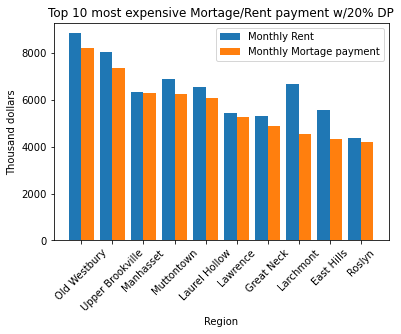

In [26]:
#mortge vs rent in highest mortage cities
top5mortage=mortagetable20.sort_values('mortage', ascending=False).head(10)

X = top5mortage['RegionName'].tolist()
#X = top5mortage['State'].tolist()
Y =top5mortage['Average Rent'].tolist()
Z = top5mortage['mortage'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Monthly Rent')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Monthly Mortage payment')
plt.xticks(rotation = 45)
  
plt.xticks(X_axis, X)
plt.xlabel("Region")
plt.ylabel("Thousand dollars")
plt.title("Top 10 most expensive Mortage/Rent payment w/20% DP")
plt.legend()
plt.savefig("../ImagesHouseHunters/Top10States.png")
plt.show()

In [27]:
mortagetable3 = table1

c=0.0033;
n=30*12;


mortagetable3['mortage']=(table1['Aversage Sale']*.97)*[(c*(1+c)**(n))/((1+c)**n-1)]

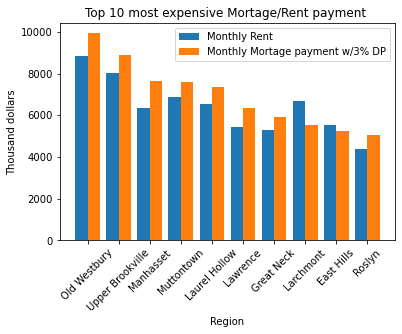

In [31]:
#mortge vs rent in highest mortage cities


top5mortage=mortagetable3.sort_values('mortage', ascending=False).head(10)

X = top5mortage['RegionName'].tolist()
#X = top5mortage['State'].tolist()
Y =top5mortage['Average Rent'].tolist()
Z = top5mortage['mortage'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Monthly Rent')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Monthly Mortage payment w/3% DP')
plt.xticks(rotation = 45)
  
plt.xticks(X_axis, X)
plt.xlabel("Region")
plt.ylabel("Thousand dollars")
plt.title("Top 10 most expensive Mortage/Rent payment ")
plt.legend()
plt.savefig("../ImagesHouseHunters/Top10States.png")
plt.show()

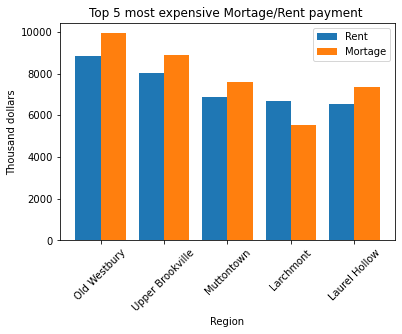

In [33]:
# mortage vs rent in highest rent cities
top5rent=mortagetable3.sort_values('Average Rent', ascending=False).head(5)

X = top5rent['RegionName'].tolist()
Y =top5rent['Average Rent'].tolist()
Z = top5rent['mortage'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Rent')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Mortage')
plt.xticks(rotation = 45)
  
plt.xticks(X_axis, X)
plt.xlabel("Region")
plt.ylabel("Thousand dollars")
plt.title("Top 5 most expensive Mortage/Rent payment ")
plt.legend()
plt.savefig("../ImagesHouseHunters/Mortgagevsrent.png")
plt.show()

In [34]:
#top5mean= pd.read_sql_query('select * from sfhomesales', con=engine).groupby('State').mean().head(5)
#top5rent=mortagetable.sort_values('Average Rent', ascending=False).head(5)
mean= pd.read_sql_query('select * from sfhomesales', con=engine).groupby('State').mean()

In [35]:
mean

,RegionID,SizeRank,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Sale
State,,,,,,,,,,,,,,,
AK,48416.886792,16516.924528,223569.264151,224520.358491,225553.735849,226510.018868,227427.754717,228224.207547,229226.471698,230478.226415,231761.981132,233585.641509,235268.471698,236567.716981,229391.154088
AL,42572.891379,14990.993103,109373.800000,109813.258621,110237.186207,110701.427586,111137.620690,111605.177586,112021.239655,112479.060345,112899.313793,113334.574138,113726.822414,114143.484483,111789.413793
AR,37341.104907,18110.736041,87705.473773,87968.189509,88207.681895,88473.350254,88750.357022,89135.013536,89551.394247,89972.060914,90271.209814,90572.634518,90874.812183,91223.891709,89392.172448
AZ,39263.275000,12119.155000,213247.750000,214109.905000,215131.230000,216303.810000,217535.675000,218670.880000,219727.025000,220779.230000,221742.340000,222595.930000,223345.435000,224285.550000,218956.230000
CA,39742.813849,11001.875899,580524.830935,583291.907374,585311.107014,586344.082734,586835.483813,587026.785072,586436.906475,585490.778777,584196.963129,583302.315647,583112.507194,583224.031475,584591.474970
CO,39619.672457,15771.622829,359663.627792,361646.610422,363518.573201,365336.354839,367086.960298,369070.642680,370678.583127,371971.037221,373092.667494,374129.637717,375147.481390,375928.503722,368939.223325
CT,80171.129032,6888.591398,308733.639785,309299.440860,309959.548387,310109.962366,310271.284946,310103.290323,310293.268817,309949.989247,310131.715054,310097.908602,310380.962366,310466.655914,309983.138889
DC,41568.000000,27.000000,690441.000000,697633.000000,702588.000000,706856.000000,710591.000000,715052.000000,718053.000000,720158.000000,719934.000000,724678.000000,729047.000000,733624.000000,714054.583333
DE,51676.712121,13596.272727,306458.606061,306014.515152,305785.424242,306276.181818,307306.621212,308282.530303,309424.681818,310286.409091,310366.727273,310146.348485,310324.121212,310959.242424,308469.284091


In [36]:
top5mean=mean.sort_values('Average Sale',ascending=False).head(5)
#top5rent=mortagetable.sort_values('Average Rent', ascending=False).head(5)

In [37]:
top5mean

,RegionID,SizeRank,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,Average Sale
State,,,,,,,,,,,,,,,
DC,41568.000000,27.000000,690441.000000,697633.000000,702588.000000,706856.000000,710591.000000,715052.000000,718053.000000,720158.000000,719934.000000,724678.000000,729047.000000,733624.000000,714054.583333
HI,42625.686567,11369.895522,622986.089552,624593.417910,626214.238806,626846.000000,626981.955224,628002.164179,629747.373134,632367.447761,634322.000000,636130.194030,637080.552239,637846.029851,630259.788557
CA,39742.813849,11001.875899,580524.830935,583291.907374,585311.107014,586344.082734,586835.483813,587026.785072,586436.906475,585490.778777,584196.963129,583302.315647,583112.507194,583224.031475,584591.474970
MA,113734.986301,8139.328767,437041.506849,438550.008219,439925.506849,440599.717808,441308.917808,441891.487671,442814.484932,443330.860274,443713.767123,443855.178082,443964.545205,443866.098630,441738.506621
NJ,96694.236036,8036.124324,411633.536937,411879.059459,412389.482883,413072.324324,414059.403604,415266.549550,416092.434234,416320.841441,416189.677477,415982.594595,415919.598198,416112.322523,414576.485435


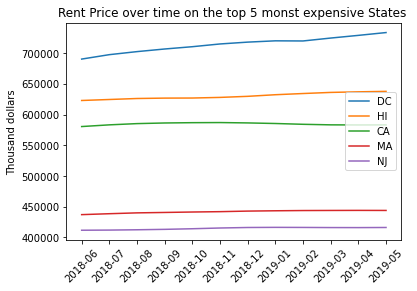

In [39]:
# Plot AK
x = ['2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05']
yDC = top5mean.iloc[[0]][x].values[0].tolist()
yHI = top5mean.iloc[[1]][x].values[0].tolist()
yCA = top5mean.iloc[[2]][x].values[0].tolist()
yMA = top5mean.iloc[[3]][x].values[0].tolist()
yNJ = top5mean.iloc[[4]][x].values[0].tolist()

plt.plot(x,yDC)
plt.plot(x,yHI)
plt.plot(x,yCA)
plt.plot(x,yMA)
plt.plot(x,yNJ)
plt.xticks(rotation = 45)
plt.legend(['DC', 'HI','CA','MA','NJ'])
plt.ylabel("Thousand dollars")
plt.title("Rent Price over time on the top 5 monst expensive States ")
plt.savefig("../ImagesHouseHunters/Top5States.png")
plt.show()